# Working on Simple Linear regression using Yahoo Finance provides stock market data



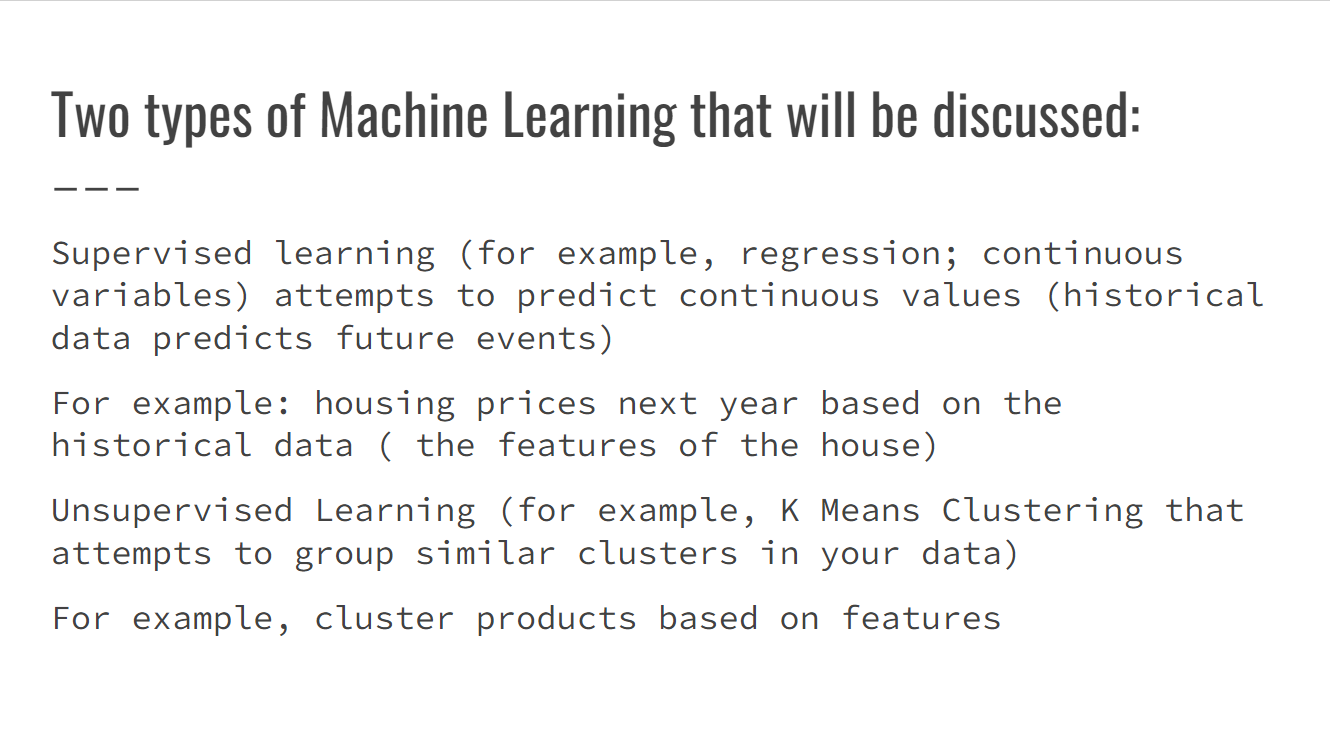

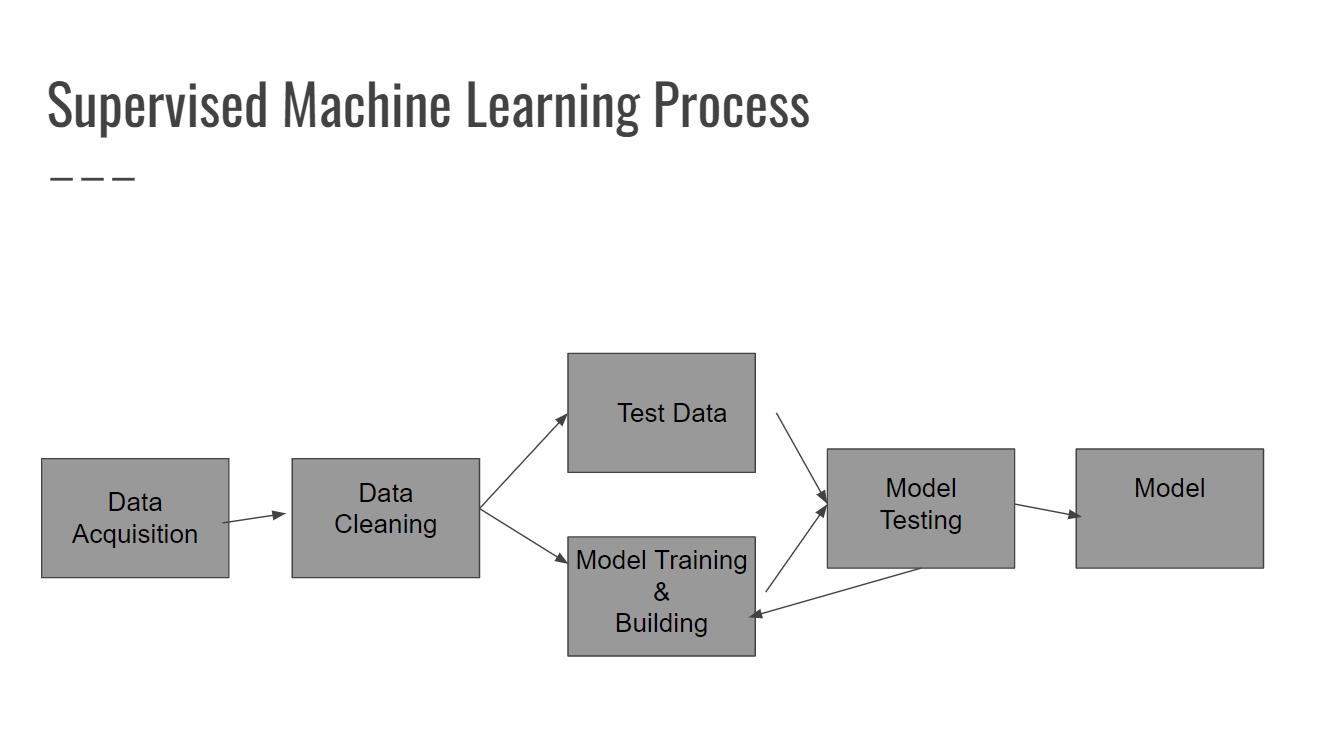

One type of of supervised machine learning algorithms is Regression. It predicts continuous value outputs.

For example, predicting the price of a house in dollars is a regression problem

The term “linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression. If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that best fits the data points,

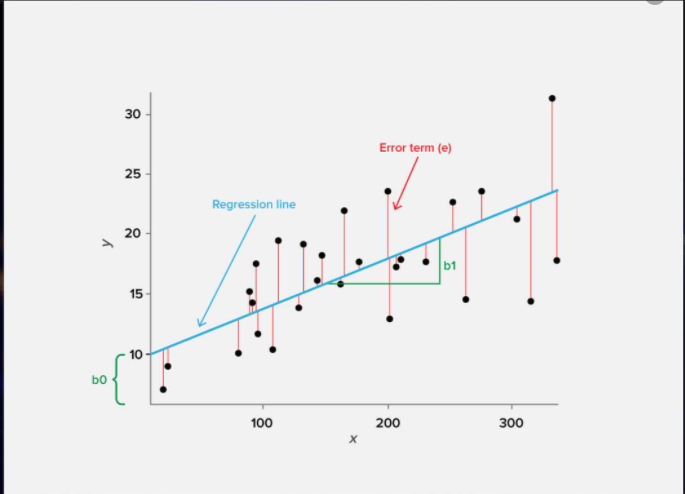

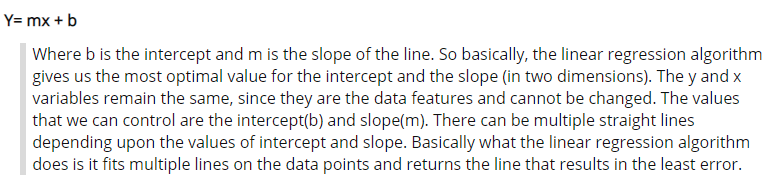

Multiple Linear Regression

 Almost all the real-world problems that you are going to encounter will have more than two variables. Linear regression involving multiple variables is called “multiple linear regression” or multivariate linear regression. The steps to perform multiple linear regression are almost similar to that of simple linear regression. The difference lies in the evaluation. You can use it to find out which factor has the highest impact on the predicted output and how different variables relate to each other.

In [ ]:
#Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime

# easy access to various financial data sources
# from: https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-yahoo
import pandas_datareader.data as web
from pandas import Series, DataFrame

import seaborn as seabornInstance 
# splitting the dataset into train and test
from sklearn.model_selection import train_test_split 
# the module required for linear regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.float_format = "{:,.2f}".format

In [ ]:
import pandas_datareader.data as web
"""
Stooq Index Data
Google finance doesn’t provide common index data download. The Stooq site has the data for download. 'stooq'
---
SZ DJI Technology Co., Ltd. or Shenzhen DJI Sciences and Technologies Ltd. in full, more popularly known as its trade name DJI, 
which stands for Da-Jiang Innovations, is a Chinese technology company headquartered in Shenzhen, Guangdong,
"""


dji_stock_details= web.DataReader("^DJI","stooq")
dji_stock_details[:10]


,Open,High,Low,Close,Volume
Date,,,,,
2021-08-04,"35,047.44","35,047.44","34,790.62","34,792.67",304763354
2021-08-03,"34,864.10","35,120.94","34,714.33","35,116.40",321747859
2021-08-02,"34,968.56","35,192.11","34,808.20","34,838.16",305922456
2021-07-30,"35,013.26","35,106.30","34,871.13","34,935.47",331053467
2021-07-29,"34,985.99","35,171.52","34,985.99","35,084.53",272323432
2021-07-28,"35,109.95","35,116.37","34,876.84","34,930.93",422819077
2021-07-27,"35,078.90","35,078.90","34,878.07","35,058.52",389294787
2021-07-26,"35,055.86","35,150.37","34,950.19","35,144.31",304893565
2021-07-23,"34,855.11","35,095.33","34,855.11","35,061.55",342258461


In [ ]:
#defining dates
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2021, 8, 1)

# providing stock tickers and the data source
df_both = web.DataReader(['BABA', 'AMZN'], 'stooq', start, end)
df_both.tail()

Attributes  Close            High           ...   Open             Volume         
Symbols      BABA     AMZN   BABA     AMZN  ...   BABA     AMZN      BABA     AMZN
Date                                        ...                                   
2020-01-08 218.00 1,891.97 220.65 1,911.00  ... 216.60 1,898.04  11983091  3511966
2020-01-07 217.63 1,906.86 218.94 1,913.89  ... 217.64 1,904.50   9539012  4134010
2020-01-06 216.64 1,902.88 217.16 1,903.69  ... 214.89 1,860.00  11892484  4065698
2020-01-03 217.00 1,874.97 218.20 1,886.20  ... 216.35 1,864.50   8608281  3766604
2020-01-02 219.77 1,898.01 219.98 1,898.01  ... 216.60 1,875.00  15882903  4035910

[5 rows x 10 columns]

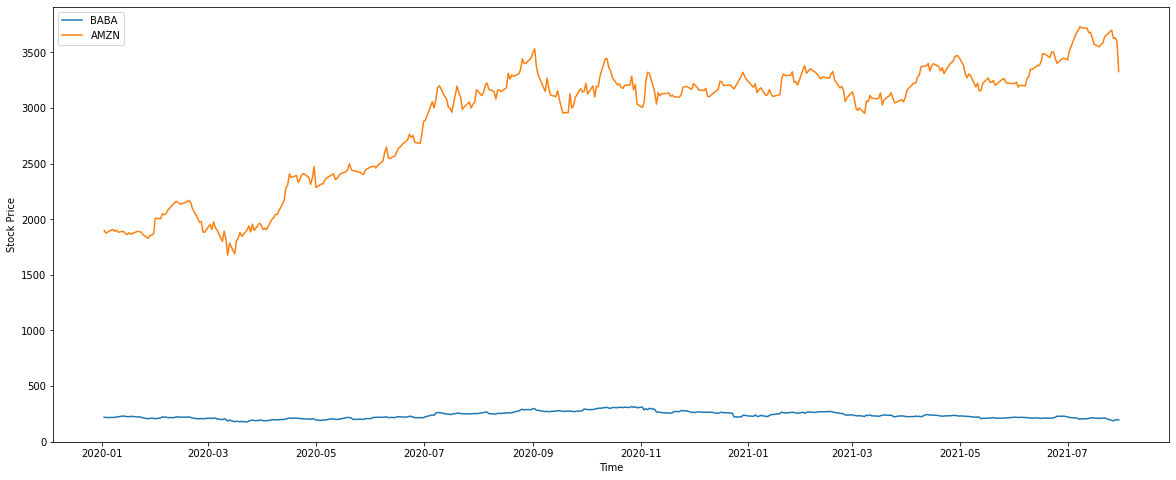

In [ ]:
# visualizing their closing price over time
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(df_both.index, df_both['Close','BABA'], label = 'BABA')
ax.plot(df_both.index, df_both['Close','AMZN'], label = 'AMZN')

ax.set_xlabel("Time")
ax.set_ylabel("Stock Price")
plt.legend(loc="upper left")

plt.show()

In [ ]:
# importing just Alibaba group information
#defining dates
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2021, 8, 1)

# providing stock tickers and the data source
df = web.DataReader('BABA', 'stooq', start, end)
df.tail()


,Open,High,Low,Close,Volume
count,650.00,650.00,650.00,650.00,650.00
mean,212.63,214.99,209.86,212.53,"17,302,996.46"
std,39.68,40.06,38.96,39.55,"10,086,369.94"
min,134.13,134.87,129.83,130.60,"5,522,987.00"
25%,179.08,180.72,176.88,178.87,"11,498,474.75"
50%,209.91,212.09,208.54,210.33,"14,957,619.50"
75%,237.55,240.69,234.60,237.02,"19,664,499.00"
max,313.50,319.32,308.91,317.14,"141,830,000.00"


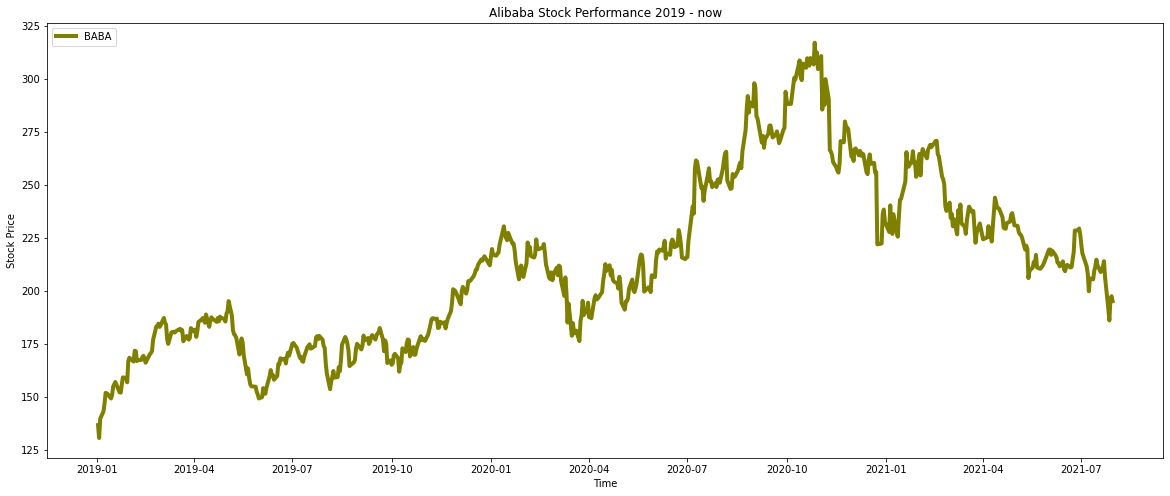

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df.index, df['Close'], label = 'BABA', linewidth=4, color = 'olive')

ax.set_xlabel("Time")
ax.set_ylabel("Stock Price")
plt.legend(loc="upper left")
ax.set_title("Alibaba Stock Performance 2019 - now")
plt.show()

In [ ]:
# checking for null values
df.isna().sum() 

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,650.00,650.00,650.00,650.00,650.00
mean,212.63,214.99,209.86,212.53,"17,302,996.46"
std,39.68,40.06,38.96,39.55,"10,086,369.94"
min,134.13,134.87,129.83,130.60,"5,522,987.00"
25%,179.08,180.72,176.88,178.87,"11,498,474.75"
50%,209.91,212.09,208.54,210.33,"14,957,619.50"
75%,237.55,240.69,234.60,237.02,"19,664,499.00"
max,313.50,319.32,308.91,317.14,"141,830,000.00"


In [ ]:
df.corr()

,Open,High,Low,Close,Volume
Open,1.00,1.00,1.00,1.00,0.00
High,1.00,1.00,1.00,1.00,0.01
Low,1.00,1.00,1.00,1.00,-0.02
Close,1.00,1.00,1.00,1.00,-0.00
Volume,0.00,0.01,-0.02,-0.00,1.00


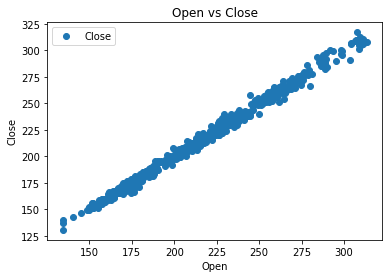

In [ ]:
# plotting the association between two variables

"""
Examining statistical associations between variables. One rather nonrigorous definition of such an association is that 
there is an association between two variables if knowing the value of one of the
variables will help to predict the value of the other variable.
"""
df.plot(x ='Open', y ='Close', style = 'o')
plt.title('Open vs Close')  
plt.xlabel('Open')  
plt.ylabel('Close')  
plt.show()

In [ ]:
# finding the correlation
#the correlation coefficient, a simple measure of linear association between two interval-level variables

df['Open'].corr(df['Close'])

0.996632918795401

##Building Linear regression Model

In [ ]:
#Our next step is to divide the data into “attributes” and “labels”.
# .values property - returns a Numpy representation of a dataframe
#creating a one dimensional array
X = df['Open'].values.reshape(-1,1)
Y = df['Close'].values.reshape(-1,1)


In [ ]:
df.shape

(650, 5)

In [ ]:
# splitting the data into training and testing set
# Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
"""
# splitting the dataset into train and test
from sklearn.model_selection import train_test_split 
"""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [ ]:
"""
After splitting the data into training and testing sets, 
finally, the time is to train our algorithm. For that, we need to import LinearRegression class, 
instantiate it, and call the fit() method along with our training data.
"""
regressor = LinearRegression()
regressor.fit(X_train,y_train) #training the algorithm, fitting the linear model


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
"""
Y = mx+b
where b is the intercept and m is the slope
"""


#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)
# if we hold all other features fixed, a one unit increase in open price would bring about 0.99 increase in a closed price /is associated

[1.5725429]
[[0.99199021]]


In [ ]:
# columns


In [ ]:
#pd.DataFrame(regressor.coef_,X.columns, columns = [''])

In [ ]:
# making predictions on the test data - passing just the features that were not seen by the model
y_pred = regressor.predict(X_test)
y_pred

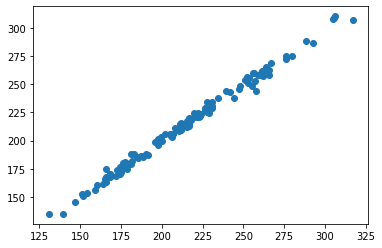

In [ ]:
# scatterplot
plt.scatter(y_test, y_pred)

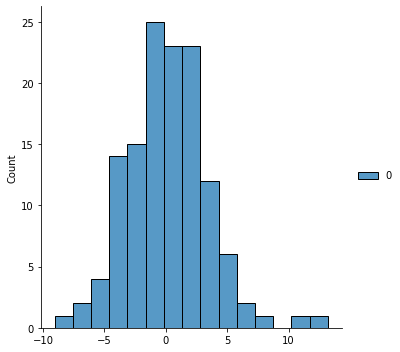

In [ ]:
# displaying the distribution of residuals
seabornInstance.displot(y_test -y_pred)
plt.show()
# if you have normally distributed residuals, it means you chose a correct model

In [ ]:
# how far off are the prediction from the actual prices
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1


,Actual,Predicted
0,168.25,170.40
1,222.88,221.15
2,199.46,203.56
3,171.83,168.77
4,174.33,176.42
...,...,...
125,214.83,213.11
126,261.01,259.70
127,151.32,152.19
128,174.84,172.94


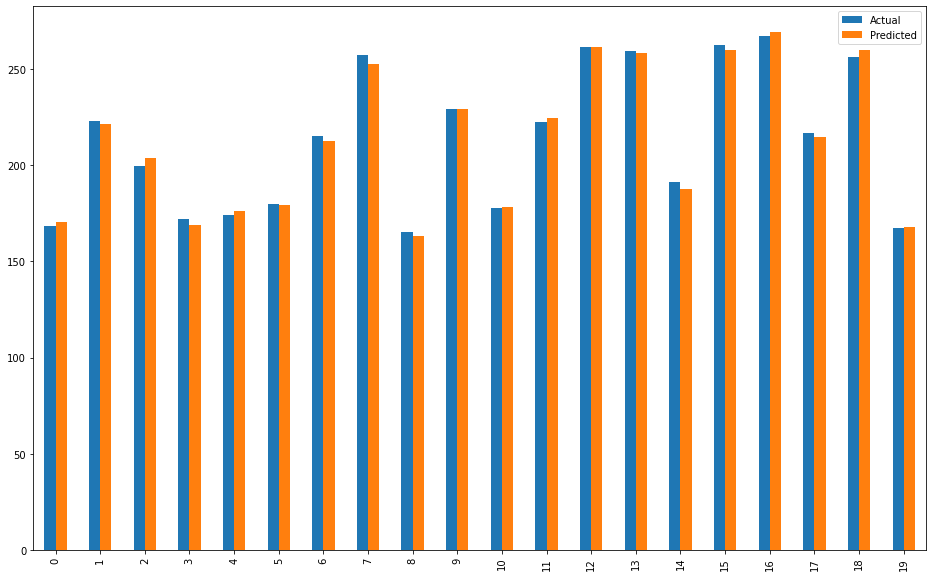

In [ ]:
df_vis = df1.head(20)
df_vis.plot(kind='bar',figsize=(16,10))

plt.show()

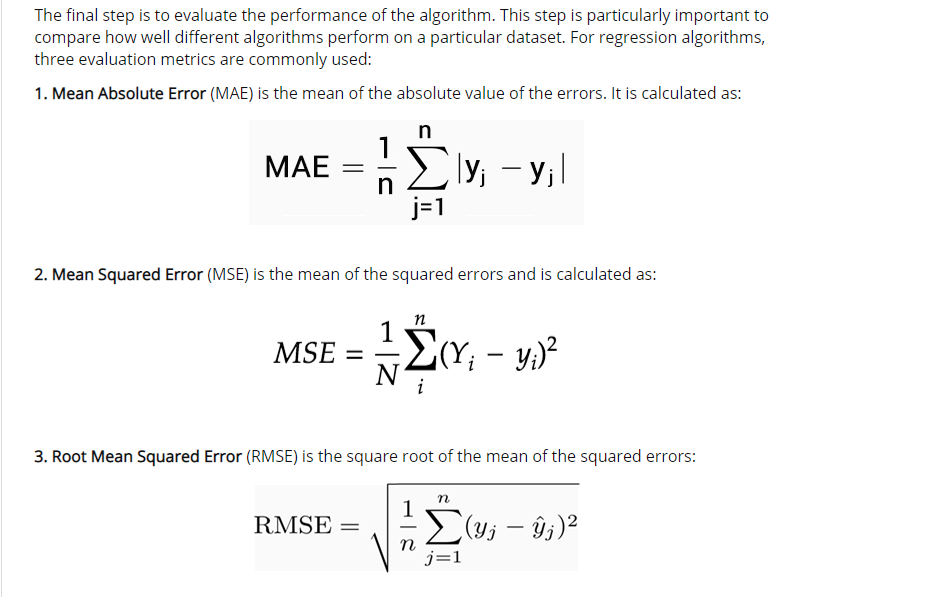

In [ ]:
# evaluating the performance of the algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))                 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.492395368513893
Mean Squared Error: 10.603843849535714
Root Mean Squared Error: 3.25635438021351


### Template

In [ ]:
"""
1. Our next step is to divide the data into “attributes” and “labels”.
.values property - returns a Numpy representation of a dataframe
creating a one dimensional array

X = df['col_x'].values.reshape(-1,1)
y = df['col_y'].values.reshape(-1,1)

2. splitting the data into training and testing set
Next, we split 80% of the data to the training set while 20% of the data to test set using below code.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

3. After splitting the data into training and testing sets, 
finally, the time is to train our algorithm. For that, we need to import LinearRegression class, 
instantiate it, and call the fit() method along with our training data.

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

4. # making predictions on the test data
y_pred = regressor.predict(X_test)

5. optional. Creating the dataframe with actuals vs presicted:
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1

6.evaluating the performance of the algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))                 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


"""


"\n1. Our next step is to divide the data into “attributes” and “labels”.\n.values property - returns a Numpy representation of a dataframe\ncreating a one dimensional array\n\nX = df['col_x'].values.reshape(-1,1)\ny = df['col_y'].values.reshape(-1,1)\n\n2. splitting the data into training and testing set\nNext, we split 80% of the data to the training set while 20% of the data to test set using below code.\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)\n\n3. After splitting the data into training and testing sets, \nfinally, the time is to train our algorithm. For that, we need to import LinearRegression class, \ninstantiate it, and call the fit() method along with our training data.\n\nregressor = LinearRegression()  \nregressor.fit(X_train, y_train) #training the algorithm\n\n4. # making predictions on the test data\ny_pred = regressor.predict(X_test)\n\n5. optional. Creating the dataframe with actuals vs presicted:\ndf1 = pd.DataFrame({'

## Multiple Linear regression

In [ ]:
# selecting two columns
dfreg = df.loc[:,['Volume', 'Close']]
#high low percentage; that is the % spread based on the closing price, which is our crude measure of volatility
HL_PCT = (df['High'] - df['Low']) / df['Close'] * 100.0
# adding a column at a specific position:
# specify the position, name of the column and the data you're inserting
#https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
dfreg.insert(1,'HL_PCT',HL_PCT)

#daily percent change:
PCT_change = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.insert(2,'PCT_change',PCT_change)

In [ ]:
dfreg.tail()

,Volume,HL_PCT,PCT_change,Close
Date,,,,
2019-01-08,16487647,3.74,1.23,146.79
2019-01-07,17238999,3.54,1.81,143.10
2019-01-04,22845435,5.31,4.09,139.75
2019-01-03,19531256,3.86,-2.73,130.60
2019-01-02,16708377,3.45,1.92,136.70


In [ ]:
# dividing the dataset in attributes and labels
# dividing the dataset in attributes and labels
X = dfreg.iloc[:,:-1].values
y = dfreg.iloc[:,-1].values

<Figure size 1080x720 with 0 Axes>

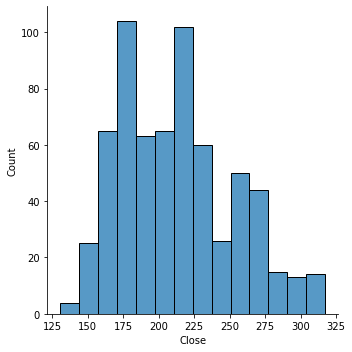

In [ ]:
#Let's check the average value of the “closing price” column.
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.displot(dfreg['Close'])
plt.show()

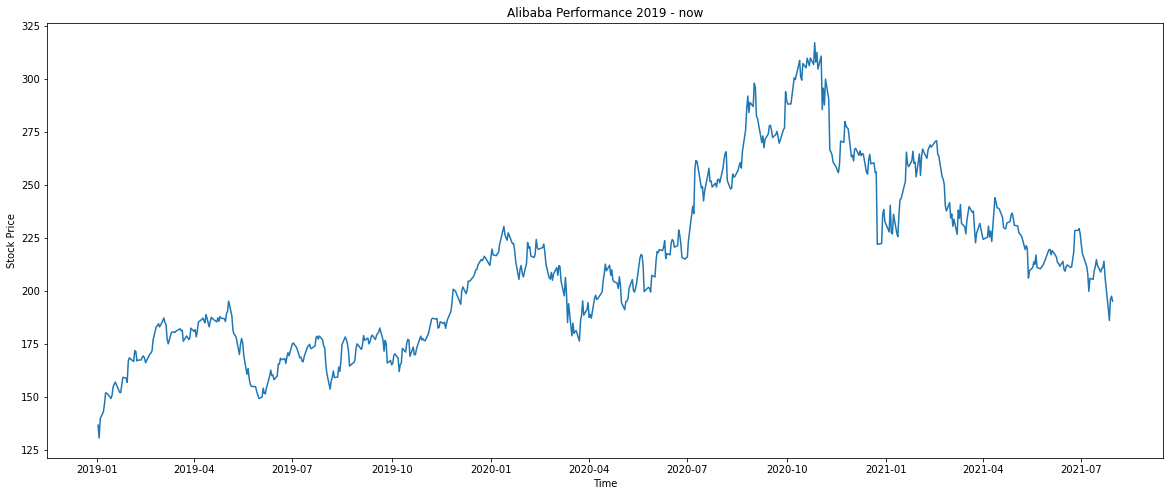

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(dfreg.index, dfreg['Close'])
#ax.plot(dfreg.index, dfreg['just_mean'])
#ax.plot(dfreg.index, dfreg['mavg'])


ax.set_xlabel("Time")
ax.set_ylabel("Stock Price")

ax.set_title("Alibaba Performance 2019 - now")

plt.show()

In [ ]:
# splitting the data into training and testing set
# Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,dfreg.iloc[:,:-1].columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Volume,-0.00
HL_PCT,3.05
PCT_change,-0.23


In [ ]:
# predicting the values

y_pred = regressor.predict(X_test)
y_pred

array([212.18277911, 210.56447145, 215.24875389, 212.545693  ,
       211.56750681, 210.79964838, 211.2709612 , 214.73234652,
       215.33306868, 210.75498431, 210.54549425, 211.55445919,
       209.37386937, 212.18071075, 212.7271516 , 210.42485231,
       210.68205175, 210.26118455, 211.27950164, 210.20084895,
       213.9282758 , 214.00561242, 219.47420966, 209.02008079,
       211.30444299, 211.83091509, 217.78726864, 215.50705695,
       211.77230975, 219.69953217, 209.19852049, 212.70924435,
       212.65356681, 212.42294113, 210.20364563, 215.67262068,
       213.62294697, 214.74439575, 211.74318923, 216.5436546 ,
       209.36542082, 209.03499122, 210.70420042, 212.92088296,
       214.38060088, 210.67701474, 218.39635941, 210.0168403 ,
       211.02683476, 214.28592177, 209.69667996, 210.59130083,
       210.13658199, 213.62118277, 209.11569855, 209.13715464,
       215.47529137, 210.70416518, 208.688244  , 211.14119601,
       209.31126396, 213.42488465, 217.36942873, 210.41

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df1 = df.head(25)

df1

,Actual,Predicted
0,168.25,212.18
1,222.88,210.56
2,199.46,215.25
3,171.83,212.55
4,174.33,211.57
5,180.00,210.80
6,215.28,211.27
7,256.96,214.73
8,165.51,215.33
9,229.25,210.75


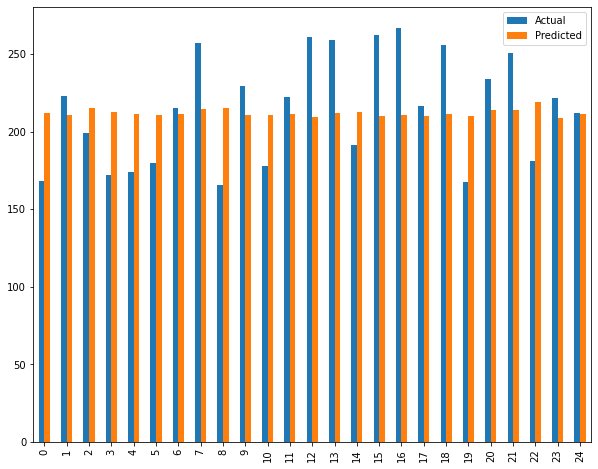

In [ ]:
df1.plot(kind='bar',figsize=(10,8))

plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 32.95510985047718
Mean Squared Error: 1616.8400878099317
Root Mean Squared Error: 40.20995010951806


## Diabetes Dataset

In [ ]:
from sklearn import datasets

# from - https://www.youtube.com/watch?v=R15LjD8aCzc

# the dataset - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [ ]:
# load dataset# load dataset
diabetes = datasets.load_diabetes()


In [ ]:
 # first ten variables are going to be our X variables and the 11th variable is going to be our Y
 print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
# printing feature names
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
## creating X and Y data matrices
X1 = diabetes.data
y1 = diabetes.target

In [ ]:
X1.shape, y1.shape

((442, 10), (442,))

In [ ]:
# data split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [ ]:
# data dimension
X1_train.shape, y1_train.shape

((353, 10), (353,))

In [ ]:
# Linear regression Model
## importing the libraries
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
# building regression model
# defining it

model = linear_model.LinearRegression()

In [ ]:
# building it
model.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y1_pred = model.predict(X1_test)
y1_pred

array([238.47145247, 248.93170646, 164.05404165, 120.30794355,
       187.42422054, 259.04865002, 113.55556372, 188.07597044,
       149.49663441, 236.01099949, 172.24629506, 178.88073764,
       109.15751983,  92.13508975, 243.33042043,  87.356971  ,
       155.72606406,  66.99073989, 100.42610442, 218.09422877,
       196.66287912, 161.29832968, 161.70779605, 156.52520454,
       197.88796516, 167.57984206, 120.74478913,  84.83879727,
       192.03728687, 160.60687024, 175.17178362,  84.22833237,
       145.7995542 , 145.97333493, 140.96488953, 197.00421108,
       165.94322494, 190.65906468, 128.22520508, 206.41941223,
        84.35851196, 164.0256504 , 144.1056776 , 184.68355549,
       177.80238966,  74.32855231, 143.3660286 , 138.67726085,
       120.81146113, 234.34252077, 161.94390244,  74.5455476 ,
       154.71905074, 156.78884927, 237.42227096, 174.23053048,
       190.88212635, 118.98373473, 132.20418974, 168.52674824,
       214.74245466, 171.42364091, 157.37409906, 108.86

In [ ]:
# prediction results


print('coefficients:', model.coef_)
print('intercept:',)
print('mean squared error : %.2f' % mean_squared_error (y1_test,y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test,y1_pred)))
print(' coef of determination R^2 : %.2f' % r2_score(y1_test,y1_pred))

coefficients: [ -35.55683674 -243.1692265   562.75404632  305.47203008 -662.78772128
  324.27527477   24.78193291  170.33056502  731.67810787   43.02846824]
intercept:
mean squared error : 3424.32
Root Mean Squared Error: 58.51766133582009
 coef of determination R^2 : 0.33


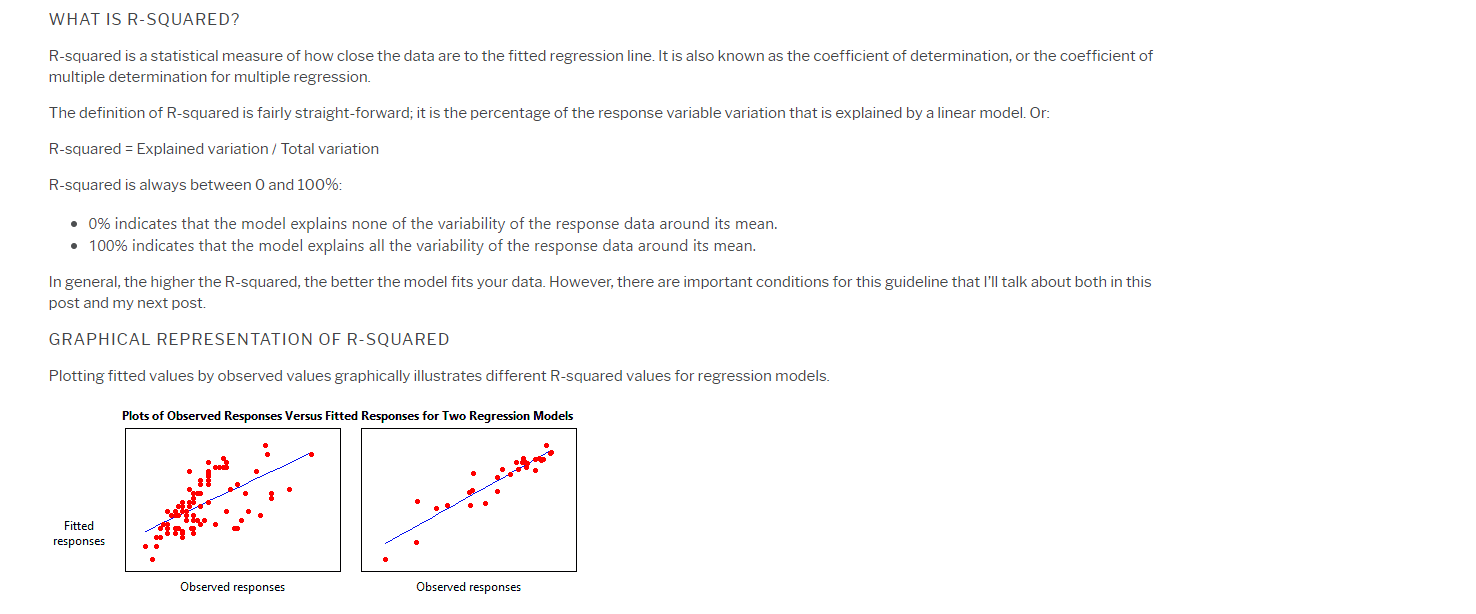

In [ ]:
#from: https://blog.minitab.com/en/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit